# UPA - project 2 - Exploratory analysis
authors: xkryst02, xkrusi01, xseipe00

year: 2022/23

In [1]:
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

NUMERICS = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

rawDf = pd.read_csv(config.RAW_DATA_PATH)

# Data frame for exploratory analysis
df = rawDf.copy()


### Attribute analysis  

In [2]:
# Data types in dataset 
df.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

In [3]:
# Minumum, maximum, mean, median and count of numeric attributes
df.describe(percentiles=[0.5])

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [4]:
# Count of records for all studies
df.studyName.value_counts().head()

PAL0910    120
PAL0809    114
PAL0708    110
Name: studyName, dtype: int64

In [5]:
# Count of penguins by species
df.Species.value_counts().head()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [6]:
# Count of penguins by regions
df.Region.value_counts().head()
# NOTE: All penguins are from Anvers

Anvers    344
Name: Region, dtype: int64

In [7]:
# Count of penguins on islands
df.Island.value_counts().head()

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

In [8]:
# Count of penguins by stage
df.Stage.value_counts().head()
# NOTE: all penguins are adults

Adult, 1 Egg Stage    344
Name: Stage, dtype: int64

In [9]:
# Count of penguins by sex
df.Sex.value_counts().head()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [10]:
# Remove false value in Sex attribute
df.Sex.replace('.', np.nan, inplace=True)
pass

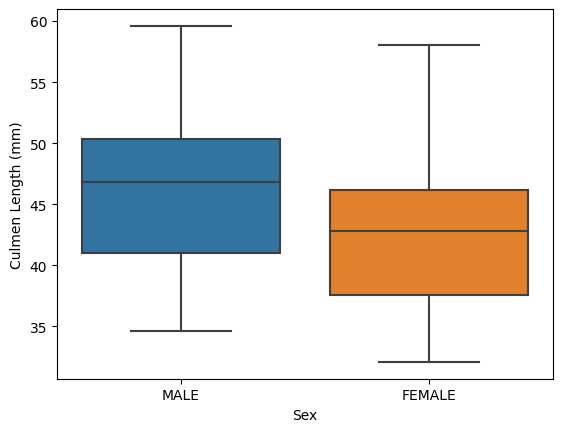

In [11]:
# Dependency of sex to culmen length
sns.boxplot( x=df['Sex'], y=df['Culmen Length (mm)'])
plt.show()

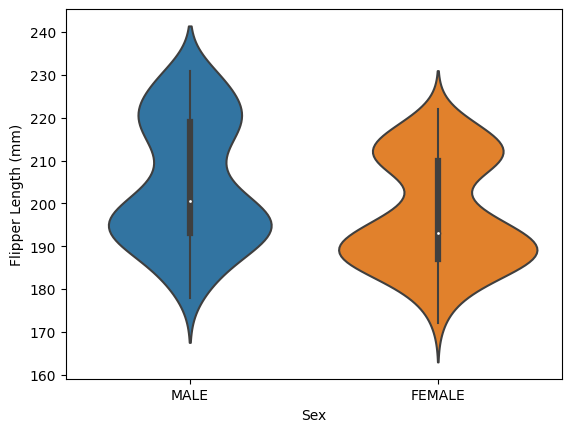

In [12]:
# Dependency of sex to Flipper length
sns.violinplot( x=df['Sex'], y=df['Flipper Length (mm)'])
plt.show()

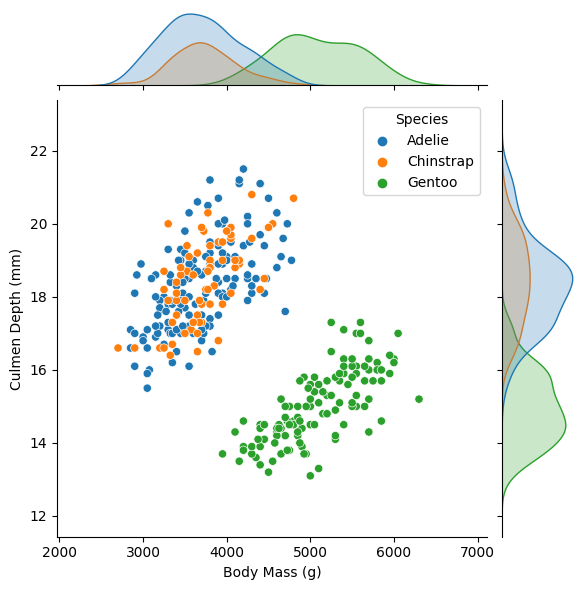

In [13]:
# Dependency of culmen depth to species and body mass
sns.jointplot(data=df, x="Body Mass (g)", y="Culmen Depth (mm)", hue=df.Species.apply(lambda x: x.split(' ', 1)[0]))
plt.show()

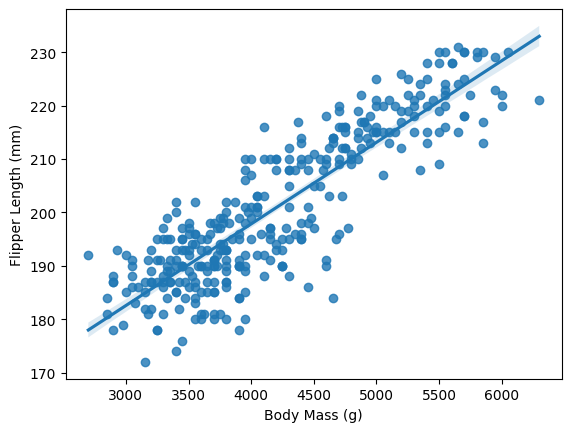

In [14]:
# Dependency of body mass to flipper length
sns.regplot(data = df, x = "Body Mass (g)", y = "Flipper Length (mm)")
plt.show()

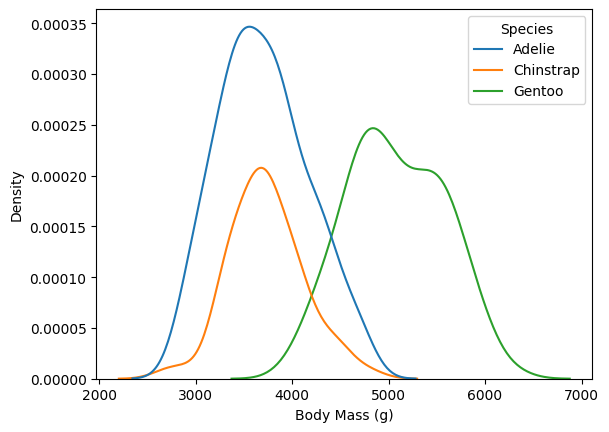

In [15]:
# Dependency of body mass to species
sns.kdeplot(data = df, x = "Body Mass (g)", hue=df.Species.apply(lambda x: x.split(' ', 1)[0]), multiple='layer')
plt.show()

## Outliers

In [16]:
# Find outliers based on z-score
numericOnly = df.select_dtypes(include=NUMERICS).dropna()
for column in numericOnly.columns:
    print(numericOnly[(np.abs(stats.zscore(numericOnly[column])) > 3)].shape)
# Our data set doesn't have any outliers

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)


## Analysis of missing values

In [17]:
# Number of record with at least one empty value
df.isna().any(axis=1).sum()      

331

In [18]:
# Empty values in attributes
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [19]:
# Count of empty values {number of empty values: record count}
counter = dict()
for a, b in df.isnull().iterrows():
    count = b.sum()
    if count in counter :
        counter[count] += 1
    else:
        counter[count] = 1

counter

{2: 12, 1: 313, 7: 1, 0: 13, 3: 4, 8: 1}

## Corelation analysis

In [20]:
# Pearson correlation coefficient
pearson = df.corr(method='pearson', numeric_only=True)
pearson

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,1.000000,-0.236356,-0.022352,0.040849,-0.007042,0.006952,-0.488690
Culmen Length (mm),-0.236356,1.000000,-0.235053,0.656181,0.595110,-0.059759,0.189025
Culmen Depth (mm),-0.022352,-0.235053,1.000000,-0.583851,-0.471916,0.605874,0.429933
Flipper Length (mm),0.040849,0.656181,-0.583851,1.000000,0.871202,-0.507787,-0.376223
Body Mass (g),-0.007042,0.595110,-0.471916,0.871202,1.000000,-0.537888,-0.374638
Delta 15 N (o/oo),0.006952,-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
Delta 13 C (o/oo),-0.488690,0.189025,0.429933,-0.376223,-0.374638,0.570615,1.000000


In [21]:
# Spearman correlation coefficient
spearman = df.corr(method='spearman', numeric_only=True)
spearman

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,1.000000,-0.213298,-0.049514,0.059690,0.009278,0.009353,-0.495038
Culmen Length (mm),-0.213298,1.000000,-0.221749,0.672772,0.583800,-0.093661,0.150251
Culmen Depth (mm),-0.049514,-0.221749,1.000000,-0.523267,-0.432372,0.615697,0.430920
Flipper Length (mm),0.059690,0.672772,-0.523267,1.000000,0.839974,-0.500186,-0.356087
Body Mass (g),0.009278,0.583800,-0.432372,0.839974,1.000000,-0.553768,-0.386939
Delta 15 N (o/oo),0.009353,-0.093661,0.615697,-0.500186,-0.553768,1.000000,0.544820
Delta 13 C (o/oo),-0.495038,0.150251,0.430920,-0.356087,-0.386939,0.544820,1.000000


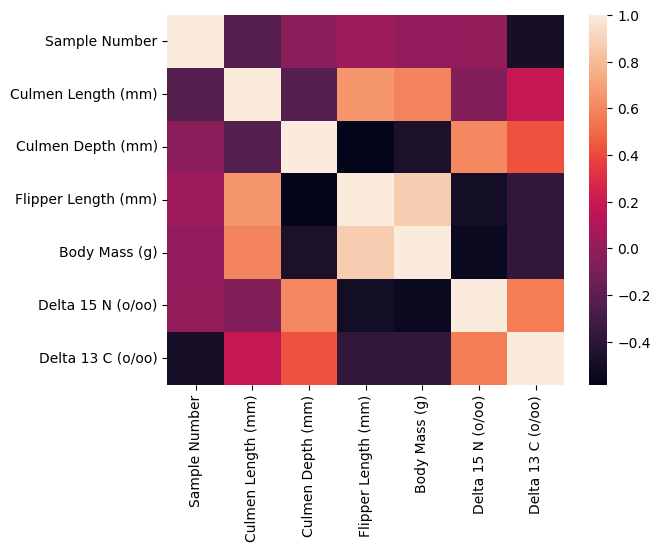

In [22]:
# Heat map based on pearson correlation coefficient
sns.heatmap(pearson, xticklabels=pearson.columns, yticklabels=pearson.columns)
plt.show()

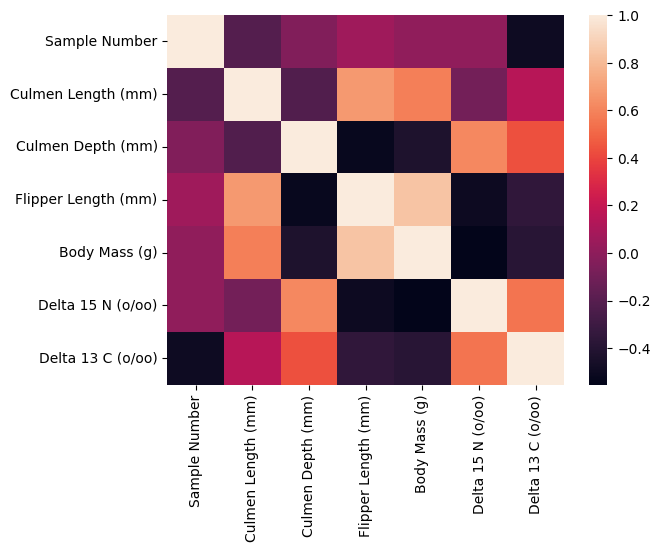

In [23]:
# Heat map based on spearman correlation coefficient
sns.heatmap(spearman, xticklabels=spearman.columns, yticklabels=spearman.columns)
plt.show()